### Analysis of White wine data

In [1]:
from path import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from pathlib import Path
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.svm import SVC
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import balanced_accuracy_score
from imblearn.metrics import classification_report_imbalanced
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import ClusterCentroids
from imblearn.ensemble import BalancedRandomForestClassifier
from imblearn.ensemble import EasyEnsembleClassifier

In [2]:
white_data = Path('all_wines.csv')
white_df = pd.read_csv(white_data)
white_df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,sulphates,alcohol,ph,quality,id,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,2,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,3,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,4,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,5,red


#### Filter to white wines only

In [3]:
white_df = white_df[white_df["color"] == "white"]
white_df.shape

(4898, 14)

In [4]:
# Missing Values
print(white_df.isna().sum())

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
sulphates               0
alcohol                 0
ph                      0
quality                 0
id                      0
color                   0
dtype: int64


In [5]:
white_df.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,sulphates,alcohol,ph,quality,id
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909,22449.500000
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639,1414.075139
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000,20001.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000,21225.250000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000,22449.500000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000,23673.750000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000,24898.000000


In [6]:
corr = white_df.corr()
corr

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,sulphates,alcohol,ph,quality,id
fixed_acidity,1.000000,-0.022697,0.289181,0.089021,0.023086,-0.049396,0.091070,0.265331,-0.425858,-0.017143,-0.120881,-0.113663,-0.255814
volatile_acidity,-0.022697,1.000000,-0.149472,0.064286,0.070512,-0.097012,0.089261,0.027114,-0.031915,-0.035728,0.067718,-0.194723,0.002858
citric_acid,0.289181,-0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,-0.163748,0.062331,-0.075729,-0.009209,-0.149900
residual_sugar,0.089021,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,-0.194133,-0.026664,-0.450631,-0.097577,0.006624
chlorides,0.023086,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,-0.090439,0.016763,-0.360189,-0.209934,-0.045645
free_sulfur_dioxide,-0.049396,-0.097012,0.094077,0.299098,0.101392,1.000000,0.615501,0.294210,-0.000618,0.059217,-0.250104,0.008158,-0.011929
total_sulfur_dioxide,0.091070,0.089261,0.121131,0.401439,0.198910,0.615501,1.000000,0.529881,0.002321,0.134562,-0.448892,-0.174737,-0.161979
density,0.265331,0.027114,0.149503,0.838966,0.257211,0.294210,0.529881,1.000000,-0.093591,0.074493,-0.780138,-0.307123,-0.185976
sulphates,-0.425858,-0.031915,-0.163748,-0.194133,-0.090439,-0.000618,0.002321,-0.093591,1.000000,0.155951,0.121432,0.099427,-0.115774
alcohol,-0.017143,-0.035728,0.062331,-0.026664,0.016763,0.059217,0.134562,0.074493,0.155951,1.000000,-0.017433,0.053678,0.009808


#### Categorize quality to >=7 as Good and < 7 and Not good

In [7]:
white_df['quality_2'] = (white_df['quality'] >=  7).astype(int)

In [8]:
white_df.head(10)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,sulphates,alcohol,ph,quality,id,color,quality_2
1599,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,20001,white,0
1600,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,20002,white,0
1601,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,20003,white,0
1602,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,20004,white,0
1603,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,20005,white,0
1604,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,20006,white,0
1605,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6,20007,white,0
1606,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,20008,white,0
1607,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,20009,white,0
1608,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6,20010,white,0


#### Create Target and Features
- quality_2 is the binary outcome (1-Good, 0-Not good)
- quality, id, color are dropped since they aren't needed in the model

In [9]:
y = white_df["quality_2"]
X = white_df.drop(columns=["quality","quality_2","id","color"])

In [10]:
X.head(10)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,sulphates,alcohol,ph
1599,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
1600,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
1601,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
1602,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
1603,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
1604,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
1605,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6
1606,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
1607,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
1608,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0


In [11]:
y.value_counts()

0    3838
1    1060
Name: quality_2, dtype: int64

#### Scale the data
- Scale the data since there is such a wide range of values between features. Scaling will make all the model results comparable

In [12]:
data_scaler = StandardScaler()

In [13]:
X_scaled = data_scaler.fit_transform(X)
# X_scaled

#### Split the data into test and train

In [14]:
# YOUR CODE HERE
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=7)

In [15]:
y_train.value_counts()

0    2870
1     803
Name: quality_2, dtype: int64

In [16]:
X_scaled.shape

(4898, 11)

## Logistic model
_Benefits_ - Simple to implement and effective; it works with feature scaling but does not require it.  
_Limitations_ - Poor performance on non-linear data or where features are not highly correlated.

In [17]:
model1 = LogisticRegression(solver='lbfgs',random_state=7)

In [18]:
model1.fit(X_train, y_train)

LogisticRegression(random_state=7)

#### Model predictions

In [19]:
y_pred1 = model1.predict(X_test)

In [20]:
matrix1 = confusion_matrix(y_test, y_pred1)
print(matrix1)

[[911  57]
 [186  71]]


In [21]:
report1 = classification_report(y_test, y_pred1)
print(report1)

              precision    recall  f1-score   support

           0       0.83      0.94      0.88       968
           1       0.55      0.28      0.37       257

    accuracy                           0.80      1225
   macro avg       0.69      0.61      0.63      1225
weighted avg       0.77      0.80      0.77      1225



In [22]:
importance = model1.coef_[0]
columns = X.columns
import_df = pd.DataFrame({'feature':columns, 'importance':importance})
import_df = import_df.sort_values(["importance"], ascending=False)
import_df

,feature,importance
3,residual_sugar,1.222858
8,sulphates,0.404743
0,fixed_acidity,0.372340
10,ph,0.354078
9,alcohol,0.228015
5,free_sulfur_dioxide,0.163644
6,total_sulfur_dioxide,-0.033041
2,citric_acid,-0.099051
4,chlorides,-0.265733
1,volatile_acidity,-0.418186


## SVM
_Benefits_ - Does better at handling a higher number of features.  Useful when classes can be easily separated.  Outliers have less impact.  
_Limitations_ - For larger datasets, it requires a large amount of time to process.  In the case of overlapped classes it does nt perform well.

In [23]:
# Linear kernel did not work
model2 = SVC(kernel='rbf',random_state=7)

In [24]:
model2.fit(X_train, y_train)

SVC(random_state=7)

In [25]:
y_pred2 = model2.predict(X_test)

In [26]:
matrix2 = confusion_matrix(y_test, y_pred2)
print(matrix2)

[[932  36]
 [165  92]]


In [27]:
report2 = classification_report(y_test, y_pred2)
print(report2)

              precision    recall  f1-score   support

           0       0.85      0.96      0.90       968
           1       0.72      0.36      0.48       257

    accuracy                           0.84      1225
   macro avg       0.78      0.66      0.69      1225
weighted avg       0.82      0.84      0.81      1225



In [28]:
accuracy_score(y_test, y_pred2)

0.8359183673469388

## Decision tree
_Benefits_ - Scaling or normalization of data is not required.  Can handle missing values.  
_Limitations_ Prone to overfitting.  Higher time required to train decision trees.

In [29]:
model3 = tree.DecisionTreeClassifier(random_state=7)

In [30]:
model3 = model3.fit(X_train, y_train)

In [31]:
y_pred3 = model3.predict(X_test)

In [32]:
matrix3 = confusion_matrix(y_test, y_pred3)
print(matrix3)

[[851 117]
 [ 94 163]]


In [33]:
report3 = classification_report(y_test, y_pred3)
print(report3)

              precision    recall  f1-score   support

           0       0.90      0.88      0.89       968
           1       0.58      0.63      0.61       257

    accuracy                           0.83      1225
   macro avg       0.74      0.76      0.75      1225
weighted avg       0.83      0.83      0.83      1225



In [34]:
accuracy_score(y_test, y_pred3)

0.8277551020408164

In [35]:
importance = model3.feature_importances_
columns = X.columns
import_df = pd.DataFrame({'feature':columns, 'importance':importance})
import_df = import_df.sort_values(["importance"], ascending=False)
import_df

,feature,importance
10,ph,0.211412
1,volatile_acidity,0.094541
8,sulphates,0.093522
4,chlorides,0.087650
7,density,0.084502
6,total_sulfur_dioxide,0.079256
5,free_sulfur_dioxide,0.076851
3,residual_sugar,0.075369
9,alcohol,0.069522
0,fixed_acidity,0.067947


## Random Forest Classifier
_Benefits_ - Less prone to overfitting.  
_Limitations_ - Features need to have some predictive power or else they wont work.

In [36]:
model4 = RandomForestClassifier(n_estimators=128,random_state=7) 

In [37]:
model4 = model4.fit(X_train, y_train)

In [38]:
y_pred4 = model4.predict(X_test)

In [39]:
matrix4 = confusion_matrix(y_test, y_pred4)
print(matrix4)

[[924  44]
 [107 150]]


In [40]:
report4 = classification_report(y_test, y_pred4)
print(report4)

              precision    recall  f1-score   support

           0       0.90      0.95      0.92       968
           1       0.77      0.58      0.67       257

    accuracy                           0.88      1225
   macro avg       0.83      0.77      0.79      1225
weighted avg       0.87      0.88      0.87      1225



In [41]:
accuracy_score(y_test, y_pred4)

0.876734693877551

In [42]:
importance = model4.feature_importances_
columns = X.columns
import_df = pd.DataFrame({'feature':columns, 'importance':importance})
import_df = import_df.sort_values(["importance"], ascending=False)
import_df

,feature,importance
10,ph,0.155685
7,density,0.122560
3,residual_sugar,0.089787
1,volatile_acidity,0.086737
4,chlorides,0.085782
6,total_sulfur_dioxide,0.083496
8,sulphates,0.082224
5,free_sulfur_dioxide,0.081998
9,alcohol,0.077231
2,citric_acid,0.068512


## Gradient Boosted Tree
_Benefits_ - Often provides more predictive accuracy. Lots of flexibility. No data pre-processing required. 

_Limitations_ - Training generally takes longer. It will continue improving to minimize all errors. This can overemphasize outliers and cause overfitting.

In [43]:
# Create a classifier object
learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
for learning_rate in learning_rates:
    classifier = GradientBoostingClassifier(n_estimators=20,
                                            learning_rate=learning_rate,
                                            max_features=5,
                                            max_depth=3,
                                            random_state=0)

    # Fit the model
    classifier.fit(X_train, y_train)
    print("Learning rate: ", learning_rate)

    # Score the model
    print("Accuracy score (training): {0:.3f}".format(
        classifier.score(
            X_train,
            y_train)))
    print("Accuracy score (validation): {0:.3f}".format(
        classifier.score(
            X_test,
            y_test)))
    print()

Learning rate:  0.05
Accuracy score (training): 0.789
Accuracy score (validation): 0.797

Learning rate:  0.1
Accuracy score (training): 0.823
Accuracy score (validation): 0.819

Learning rate:  0.25
Accuracy score (training): 0.849
Accuracy score (validation): 0.833

Learning rate:  0.5
Accuracy score (training): 0.858
Accuracy score (validation): 0.824

Learning rate:  0.75
Accuracy score (training): 0.866
Accuracy score (validation): 0.823

Learning rate:  1
Accuracy score (training): 0.872
Accuracy score (validation): 0.827



#### Choose the learning_rate based on highest Accuracy score = 0.25

In [44]:
model5 = GradientBoostingClassifier(n_estimators=20,
   learning_rate=0.25, max_features=10, max_depth=3, random_state=7)

In [45]:
model5 = model5.fit(X_train, y_train)

In [46]:
y_pred5 = model5.predict(X_test)

In [47]:
matrix5 = confusion_matrix(y_test, y_pred5)
print(matrix5)

[[910  58]
 [162  95]]


In [48]:
report5 = classification_report(y_test, y_pred5)
print(report5)

              precision    recall  f1-score   support

           0       0.85      0.94      0.89       968
           1       0.62      0.37      0.46       257

    accuracy                           0.82      1225
   macro avg       0.73      0.65      0.68      1225
weighted avg       0.80      0.82      0.80      1225



In [49]:
accuracy_score(y_test, y_pred5)

0.8204081632653061

In [50]:
importance = model5.feature_importances_
columns = X.columns
import_df = pd.DataFrame({'feature':columns, 'importance':importance})
import_df = import_df.sort_values(["importance"], ascending=False)
import_df

,feature,importance
10,ph,0.452525
1,volatile_acidity,0.119206
7,density,0.083357
3,residual_sugar,0.079518
4,chlorides,0.059502
5,free_sulfur_dioxide,0.057623
8,sulphates,0.046273
9,alcohol,0.036663
2,citric_acid,0.024920
0,fixed_acidity,0.021688


### The next 3 models use oversampling and undersampling because of imbalanced sample sizes.

## Random Over Sampling

_Benefits_ - Randomly duplicate examples in the minority class. This makes it simple to implement and fast to execute. 

_Limitations_ - Increase in training time for the classifier and can lead to model overfitting.

In [51]:
ros = RandomOverSampler(random_state=7)

In [52]:
Counter(y_train)

Counter({1: 803, 0: 2870})

In [53]:
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

#### New balanced sample sizes

In [54]:
Counter(y_resampled)

Counter({1: 2870, 0: 2870})

In [55]:
# Train the Logistic Regression model using the resampled data
model6 = LogisticRegression(solver='lbfgs', random_state=7)

In [56]:
model6.fit(X_resampled, y_resampled)

LogisticRegression(random_state=7)

In [57]:
y_pred6 = model6.predict(X_test)

In [58]:
print(balanced_accuracy_score(y_test, y_pred6))

0.7058759687429655


In [59]:
confusion_matrix(y_test, y_pred6)

array([[666, 302],
       [ 71, 186]], dtype=int64)

In [60]:
report6 = classification_report_imbalanced(y_test, y_pred6)
print(report6)

                   pre       rec       spe        f1       geo       iba       sup

          0       0.90      0.69      0.72      0.78      0.71      0.50       968
          1       0.38      0.72      0.69      0.50      0.71      0.50       257

avg / total       0.79      0.70      0.72      0.72      0.71      0.50      1225



In [61]:
importance = model6.coef_[0]
columns = X.columns
import_df = pd.DataFrame({'feature':columns, 'importance':importance})
import_df = import_df.sort_values(["importance"], ascending=False)
import_df

,feature,importance
3,residual_sugar,1.382043
0,fixed_acidity,0.407515
8,sulphates,0.385578
10,ph,0.353767
9,alcohol,0.201358
5,free_sulfur_dioxide,0.105409
6,total_sulfur_dioxide,-0.011092
2,citric_acid,-0.115879
4,chlorides,-0.185985
1,volatile_acidity,-0.579207


## SMOTE (Synthetic Minority Over-sampling Technique) oversampling

_Benefits_ -  Less likely to overfit. Seems to work well with low dimensional data. 

_Limitations_ - SMOTE does not take into consideration neighboring examples can be from other classes. This can increase the overlapping of classes and can introduce additional noise.

In [62]:
X_resampled, y_resampled = SMOTE(random_state=7,sampling_strategy='auto').fit_resample(
   X_train, y_train)

#### New balanced sample sizes

In [63]:
Counter(y_resampled)

Counter({1: 2870, 0: 2870})

In [64]:
model7 = LogisticRegression(solver='lbfgs', random_state=7)
model7.fit(X_resampled, y_resampled)

LogisticRegression(random_state=7)

In [65]:
y_pred7 = model7.predict(X_test)
balanced_accuracy_score(y_test, y_pred7)

0.7078214940347943

In [66]:
confusion_matrix(y_test, y_pred7)

array([[666, 302],
       [ 70, 187]], dtype=int64)

In [67]:
report7 = classification_report_imbalanced(y_test, y_pred7)
print(report7)

                   pre       rec       spe        f1       geo       iba       sup

          0       0.90      0.69      0.73      0.78      0.71      0.50       968
          1       0.38      0.73      0.69      0.50      0.71      0.50       257

avg / total       0.80      0.70      0.72      0.72      0.71      0.50      1225



In [68]:
importance = model7.coef_[0]
columns = X.columns
import_df = pd.DataFrame({'feature':columns, 'importance':importance})
import_df = import_df.sort_values(["importance"], ascending=False)
import_df

,feature,importance
3,residual_sugar,1.477460
0,fixed_acidity,0.488070
8,sulphates,0.432627
10,ph,0.356701
9,alcohol,0.229778
5,free_sulfur_dioxide,0.153623
6,total_sulfur_dioxide,-0.016238
4,chlorides,-0.135349
2,citric_acid,-0.161505
1,volatile_acidity,-0.611045


## Cluster Centroid Undersampling

_Benefits_ - Less likely to overfit. 

_Limitations_ - The result of the analysis may be less accurate.

In [69]:
cc = ClusterCentroids(random_state=7)

In [70]:
X_resampled, y_resampled = cc.fit_resample(X_train, y_train)

In [71]:
Counter(y_resampled)

Counter({0: 803, 1: 803})

In [72]:
model8 = LogisticRegression(solver='lbfgs', random_state=7, max_iter=1000)
model8.fit(X_resampled, y_resampled)

LogisticRegression(max_iter=1000, random_state=7)

In [73]:
y_pred8 = model8.predict(X_test)

In [74]:
balanced_accuracy_score(y_test, y_pred8)

0.7043605492491237

In [75]:
confusion_matrix(y_test, y_pred8)

array([[648, 320],
       [ 67, 190]], dtype=int64)

In [76]:
report8 = classification_report_imbalanced(y_test, y_pred8)
print(report8)

                   pre       rec       spe        f1       geo       iba       sup

          0       0.91      0.67      0.74      0.77      0.70      0.49       968
          1       0.37      0.74      0.67      0.50      0.70      0.50       257

avg / total       0.79      0.68      0.72      0.71      0.70      0.49      1225



In [77]:
importance = model8.coef_[0]
columns = X.columns
import_df = pd.DataFrame({'feature':columns, 'importance':importance})
import_df = import_df.sort_values(["importance"], ascending=False)
import_df

,feature,importance
3,residual_sugar,1.299026
8,sulphates,0.380763
0,fixed_acidity,0.344273
10,ph,0.231756
9,alcohol,0.127689
6,total_sulfur_dioxide,0.029292
5,free_sulfur_dioxide,0.016349
2,citric_acid,-0.238692
4,chlorides,-0.373542
1,volatile_acidity,-0.693521


##  Balanced Random Forest Classifier
_Benefits_ - It reduces overfitting problem in decision trees and also reduces the variance and therefore improves the accuracy. 

_Limitations_ -  Requires much more computational power and resources. Longer Training Period.

In [78]:
brf_model = BalancedRandomForestClassifier(n_estimators=100, random_state=7) 

In [79]:
model9 = brf_model.fit(X_train, y_train)

In [80]:
y_pred9 = model9.predict(X_test)

In [81]:
balanced_accuracy_score(y_test, y_pred9)

0.820336366852108

In [82]:
confusion_matrix(y_test, y_pred9)

array([[752, 216],
       [ 35, 222]], dtype=int64)

In [83]:
report9 = classification_report_imbalanced(y_test, y_pred9)
print(report9)

                   pre       rec       spe        f1       geo       iba       sup

          0       0.96      0.78      0.86      0.86      0.82      0.67       968
          1       0.51      0.86      0.78      0.64      0.82      0.68       257

avg / total       0.86      0.80      0.85      0.81      0.82      0.67      1225



In [84]:
importance = model9.feature_importances_
columns = X.columns
import_df = pd.DataFrame({'feature':columns, 'importance':importance})
import_df = import_df.sort_values(["importance"], ascending=False)
import_df

,feature,importance
10,ph,0.181254
7,density,0.126584
4,chlorides,0.093288
1,volatile_acidity,0.090231
3,residual_sugar,0.086026
6,total_sulfur_dioxide,0.080263
5,free_sulfur_dioxide,0.078395
8,sulphates,0.074226
2,citric_acid,0.066329
0,fixed_acidity,0.064320


## Easy Ensemble AdaBoost 
_Benefits_ - Fast, simple, and easy to program. Also, it has the flexibility to be combined with any machine learning algorithm. 

_Limitations_ - Weak classifiers can lead to overfitting.

In [85]:
eec_model = EasyEnsembleClassifier(n_estimators=100, random_state=7)

In [86]:
model10 = eec_model.fit(X_train, y_train)

In [87]:
y_pred10 = model10.predict(X_test)

In [88]:
balanced_accuracy_score(y_test, y_pred10)

0.7774825545872592

In [89]:
confusion_matrix(y_test, y_pred10)

array([[718, 250],
       [ 48, 209]], dtype=int64)

In [90]:
report10 = classification_report_imbalanced(y_test, y_pred10)
print(report10)

                   pre       rec       spe        f1       geo       iba       sup

          0       0.94      0.74      0.81      0.83      0.78      0.60       968
          1       0.46      0.81      0.74      0.58      0.78      0.61       257

avg / total       0.84      0.76      0.80      0.78      0.78      0.60      1225



#### Attempt a cool graphic of the decision tree model but a little too complicated
##### Takes a while to run-Try it on Desicions Tree classifier

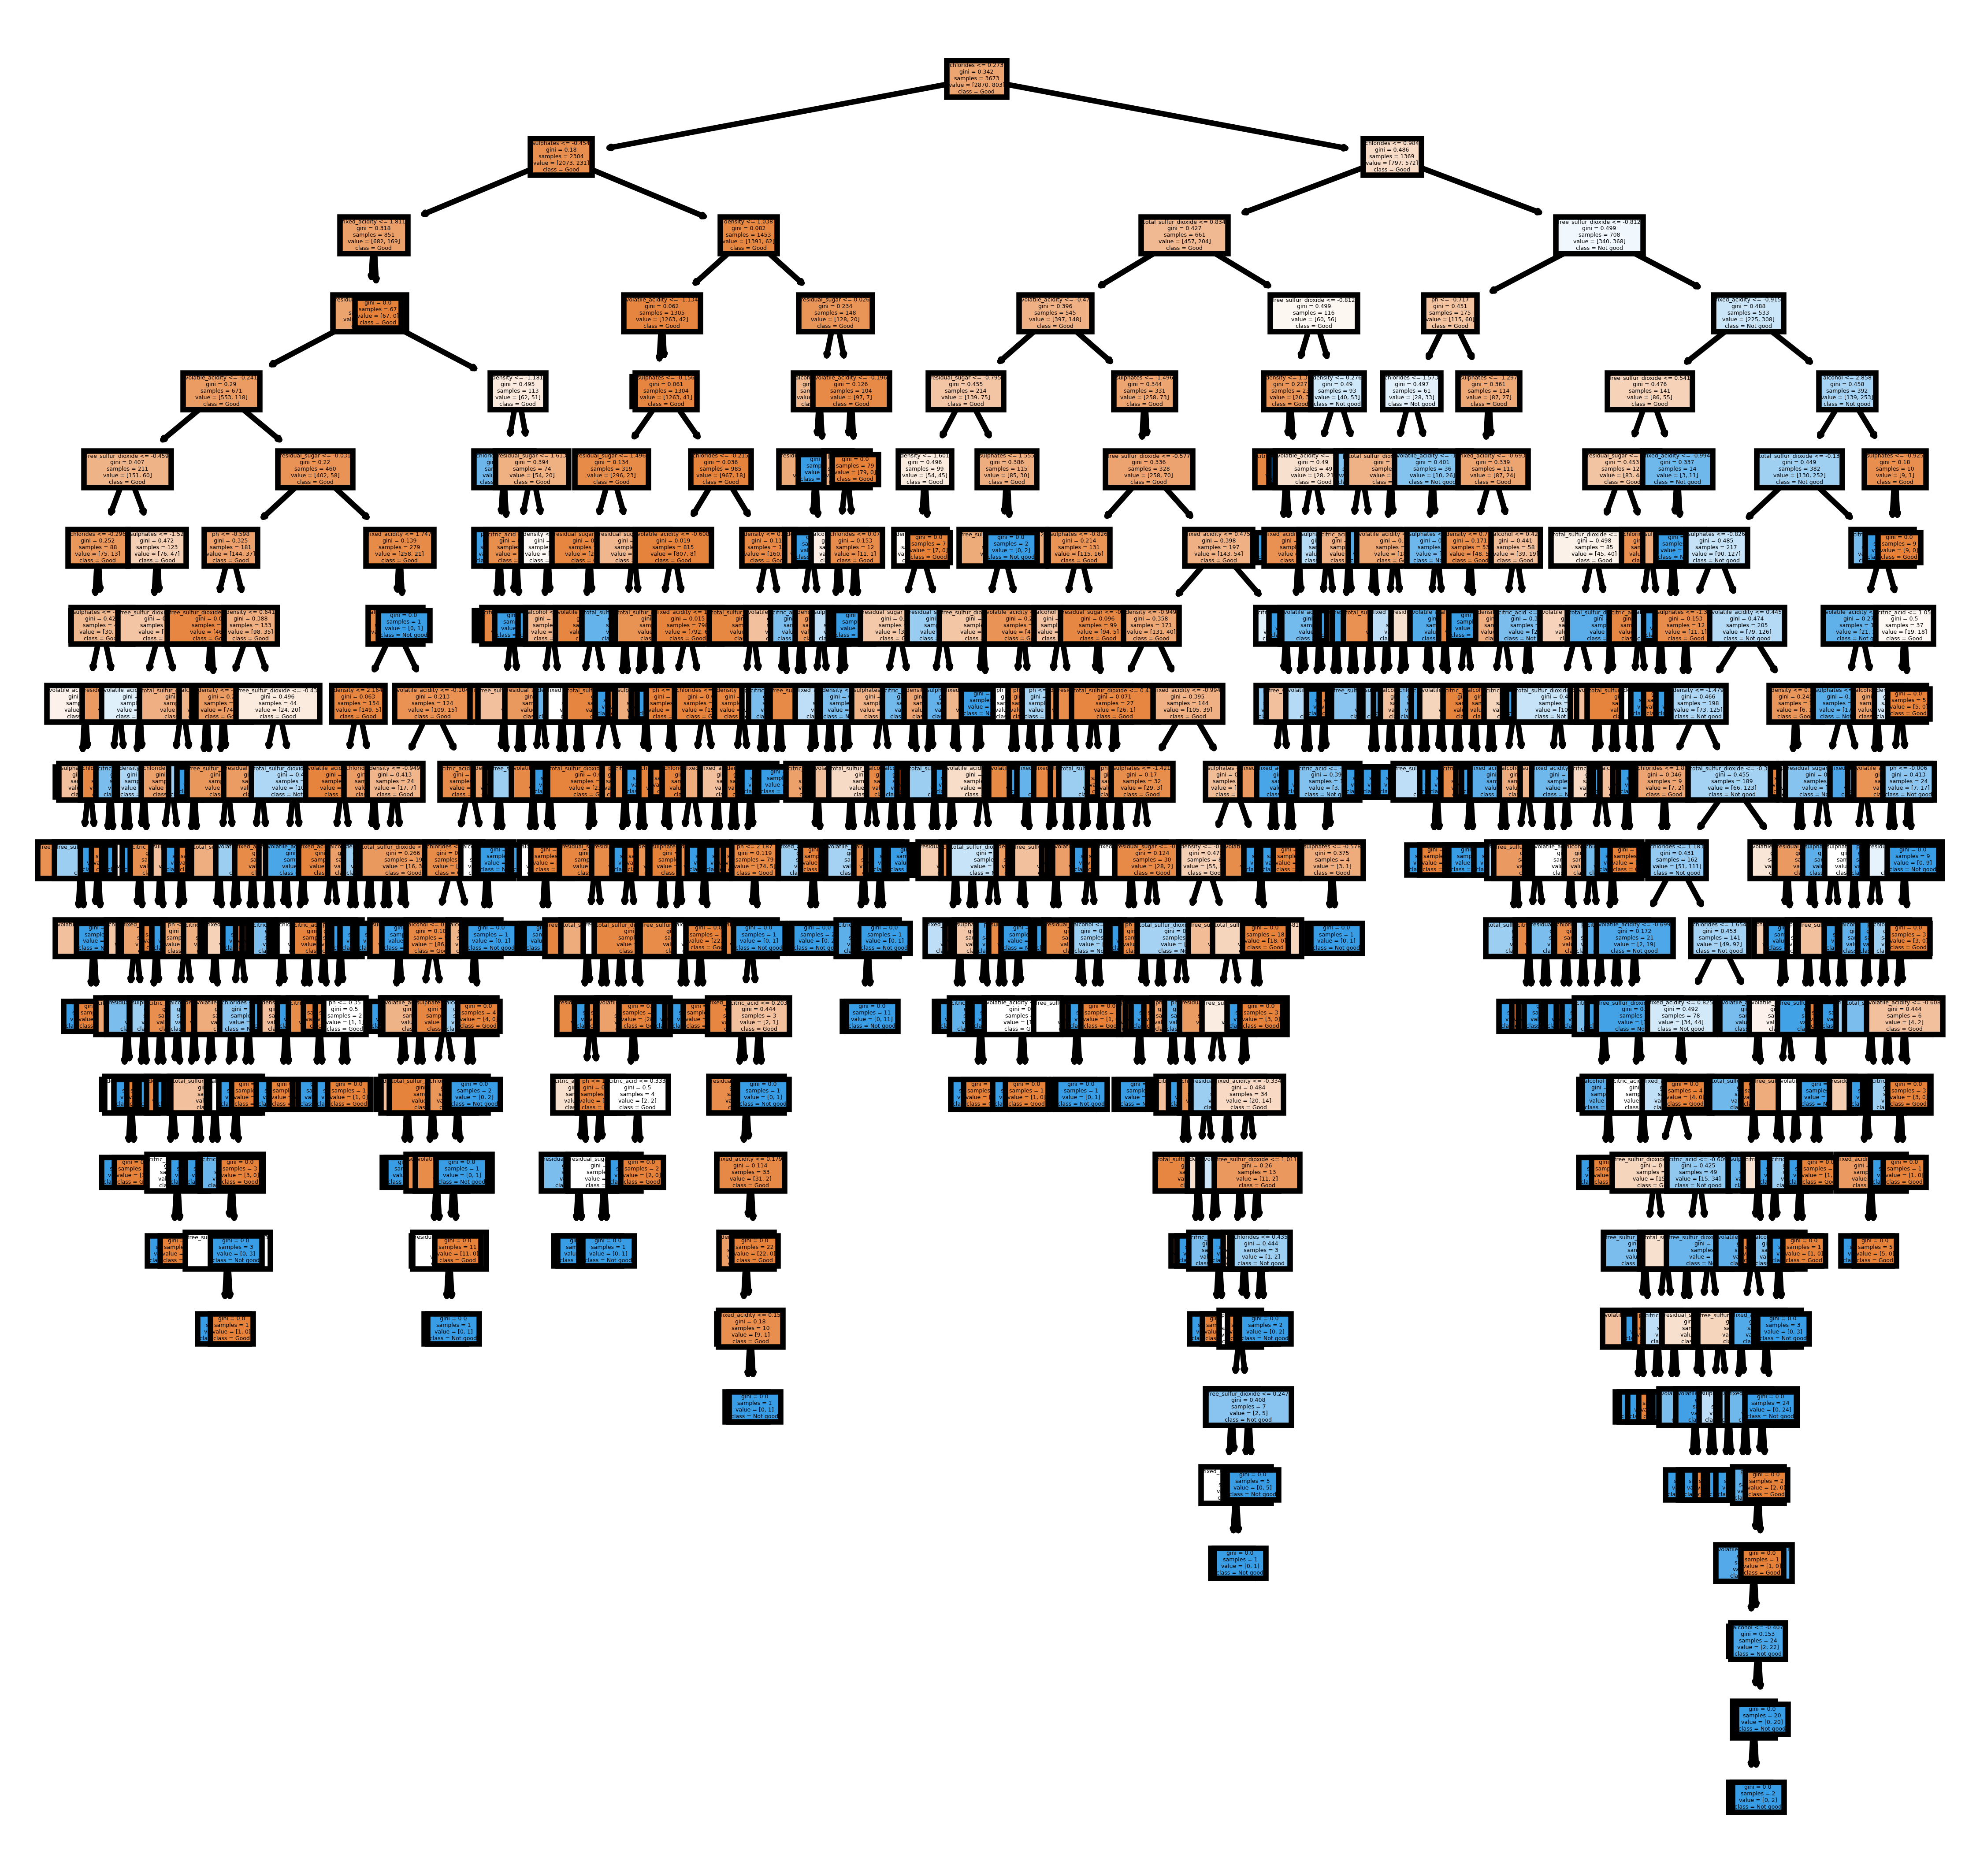

In [108]:
import matplotlib.pyplot as plt
fn=['ph', 'sulphates', 'alcohol', 'fixed_acidity', 'volatile_acidity', 'free_sulfur_dioxide', 'citric_acid', 'residual_sugar', 'density', 
'total_sulfur_dioxide', 'chlorides']
cn=['Good','Not good']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (6,6), dpi=900)

tree.plot_tree(model3,
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('Whitemodel3Tree.png')

#### Combine all the model outputs for visualization into Tableau

In [106]:
reportout1 = classification_report(y_test, y_pred1, output_dict=True)
print(reportout1)

{'0': {'precision': 0.8304466727438469, 'recall': 0.9411157024793388, 'f1-score': 0.8823244552058112, 'support': 968}, '1': {'precision': 0.5546875, 'recall': 0.27626459143968873, 'f1-score': 0.36883116883116884, 'support': 257}, 'accuracy': 0.8016326530612244, 'macro avg': {'precision': 0.6925670863719234, 'recall': 0.6086901469595138, 'f1-score': 0.62557781201849, 'support': 1225}, 'weighted avg': {'precision': 0.7725935238498317, 'recall': 0.8016326530612244, 'f1-score': 0.774595659615376, 'support': 1225}}


In [107]:
df_out1 = pd.DataFrame(reportout1).transpose()
df_out1

,precision,recall,f1-score,support
0,0.830447,0.941116,0.882324,968.000000
1,0.554688,0.276265,0.368831,257.000000
accuracy,0.801633,0.801633,0.801633,0.801633
macro avg,0.692567,0.608690,0.625578,1225.000000
weighted avg,0.772594,0.801633,0.774596,1225.000000


#### Append all the model output matrices

In [94]:
reportout1  = classification_report(y_test, y_pred1 , output_dict=True)
reportout2  = classification_report(y_test, y_pred2 , output_dict=True)
reportout3  = classification_report(y_test, y_pred3 , output_dict=True)
reportout4  = classification_report(y_test, y_pred4 , output_dict=True)
reportout5  = classification_report(y_test, y_pred5 , output_dict=True)
reportout6  = classification_report(y_test, y_pred6 , output_dict=True)
reportout7  = classification_report(y_test, y_pred7 , output_dict=True)
reportout8  = classification_report(y_test, y_pred8 , output_dict=True)
reportout9  = classification_report(y_test, y_pred9 , output_dict=True)
reportout10 = classification_report(y_test, y_pred10, output_dict=True)

In [95]:
df_out1  = pd.DataFrame(reportout1).transpose()
df_out2  = pd.DataFrame(reportout2).transpose()
df_out3  = pd.DataFrame(reportout3).transpose()
df_out4  = pd.DataFrame(reportout4).transpose()
df_out5  = pd.DataFrame(reportout5).transpose()
df_out6  = pd.DataFrame(reportout6).transpose()
df_out7  = pd.DataFrame(reportout7).transpose()
df_out8  = pd.DataFrame(reportout8).transpose()
df_out9  = pd.DataFrame(reportout9).transpose()
df_out10 = pd.DataFrame(reportout10).transpose()

#### Pick out the results for prediciting Good-1

In [96]:
df_out1= df_out1[1:3]
df_out1

,precision,recall,f1-score,support
1,0.554688,0.276265,0.368831,257.000000
accuracy,0.801633,0.801633,0.801633,0.801633


In [97]:
# df_out2

In [98]:
df_out2 = df_out2[1:3]
df_out3 = df_out3[1:3]
df_out4 = df_out4[1:3]
df_out5 = df_out5[1:3]
df_out6 = df_out6[1:3]
df_out7 = df_out7[1:3]
df_out8 = df_out8[1:3]
df_out9 = df_out9[1:3]
df_out10= df_out10[1:3]

In [99]:
# df_out9

#### Append all results

In [100]:
output_df = df_out1.append([df_out2, df_out3, df_out4, df_out5, df_out6, df_out7, df_out8, df_out9, df_out10])
output_df.drop(columns="support", axis=1, inplace=True)
output_df

,precision,recall,f1-score
1,0.554688,0.276265,0.368831
accuracy,0.801633,0.801633,0.801633
1,0.718750,0.357977,0.477922
accuracy,0.835918,0.835918,0.835918
1,0.582143,0.634241,0.607076
accuracy,0.827755,0.827755,0.827755
1,0.773196,0.583658,0.665188
accuracy,0.876735,0.876735,0.876735
1,0.620915,0.369650,0.463415
accuracy,0.820408,0.820408,0.820408


#### Final layout: columns
- 0 - Precision
- 1 - Recall
- 2 - F1 score
- 3 - Accuracy

#### Move accuracy row for each model to the end of the previous row (StackOverflow source of code)
##### https://stackoverflow.com/questions/57763470/pandas-get-second-row-and-put-it-at-the-end-of-first-row-and-automatically-cre

In [101]:
output_df = pd.DataFrame([y.values.ravel() for x , y in output_df.groupby(np.arange(len(output_df))//2)])
output_df

,0,1,2,3,4,5
0,0.554688,0.276265,0.368831,0.801633,0.801633,0.801633
1,0.718750,0.357977,0.477922,0.835918,0.835918,0.835918
2,0.582143,0.634241,0.607076,0.827755,0.827755,0.827755
3,0.773196,0.583658,0.665188,0.876735,0.876735,0.876735
4,0.620915,0.369650,0.463415,0.820408,0.820408,0.820408
5,0.381148,0.723735,0.499329,0.695510,0.695510,0.695510
6,0.382413,0.727626,0.501340,0.696327,0.696327,0.696327
7,0.372549,0.739300,0.495437,0.684082,0.684082,0.684082
8,0.506849,0.863813,0.638849,0.795102,0.795102,0.795102
9,0.455338,0.813230,0.583799,0.756735,0.756735,0.756735


In [102]:
shorter_df = output_df.drop(output_df.columns[4:6], axis=1)
shorter_df

,0,1,2,3
0,0.554688,0.276265,0.368831,0.801633
1,0.718750,0.357977,0.477922,0.835918
2,0.582143,0.634241,0.607076,0.827755
3,0.773196,0.583658,0.665188,0.876735
4,0.620915,0.369650,0.463415,0.820408
5,0.381148,0.723735,0.499329,0.695510
6,0.382413,0.727626,0.501340,0.696327
7,0.372549,0.739300,0.495437,0.684082
8,0.506849,0.863813,0.638849,0.795102
9,0.455338,0.813230,0.583799,0.756735


In [103]:
shorter_df = shorter_df.rename({0: 'Precision', 1: 'Recall', 2: 'F1', 3: 'Accuracy'}, axis=1)
shorter_df

# axis 1-columns 0-rows

,Precision,Recall,F1,Accuracy
0,0.554688,0.276265,0.368831,0.801633
1,0.718750,0.357977,0.477922,0.835918
2,0.582143,0.634241,0.607076,0.827755
3,0.773196,0.583658,0.665188,0.876735
4,0.620915,0.369650,0.463415,0.820408
5,0.381148,0.723735,0.499329,0.695510
6,0.382413,0.727626,0.501340,0.696327
7,0.372549,0.739300,0.495437,0.684082
8,0.506849,0.863813,0.638849,0.795102
9,0.455338,0.813230,0.583799,0.756735


In [104]:
shorter_df = shorter_df.rename({0: 'Model 1: Logistic', 1: 'Model 2: SVM', 2: 'Model 3: Decision Tree', 
                                3: 'Model 4: Random Forest', 4: 'Model 5: Gradient Boosted Tree', 
                                5: 'Model 6: Logisitic-ROS', 6: 'Model 7: Logistic-SMOTE', 
                                7: 'Model 8: Logistic-Cluster centroid US', 8: 'Model 9: Balanced Random Forest Classifier', 
                                9: 'Model 10: Easy Ensemble Ada Boost Classifier', 
                               }
                               , axis=0)
shorter_df


,Precision,Recall,F1,Accuracy
Model 1: Logistic,0.554688,0.276265,0.368831,0.801633
Model 2: SVM,0.718750,0.357977,0.477922,0.835918
Model 3: Decision Tree,0.582143,0.634241,0.607076,0.827755
Model 4: Random Forest,0.773196,0.583658,0.665188,0.876735
Model 5: Gradient Boosted Tree,0.620915,0.369650,0.463415,0.820408
Model 6: Logisitic-ROS,0.381148,0.723735,0.499329,0.695510
Model 7: Logistic-SMOTE,0.382413,0.727626,0.501340,0.696327
Model 8: Logistic-Cluster centroid US,0.372549,0.739300,0.495437,0.684082
Model 9: Balanced Random Forest Classifier,0.506849,0.863813,0.638849,0.795102
Model 10: Easy Ensemble Ada Boost Classifier,0.455338,0.813230,0.583799,0.756735


In [105]:
shorter_df.to_csv('df_white.csv')